# Anscombe's quartet
----------------

Frank Anscombe was a British Statistician and his dataset is from early 1970. We do not know how the dateset what constructed but we do know that Anscombe created it to emphasize the importance of visualizing your data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = sns.load_dataset("anscombe")
df.T

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
dataset,I,I,I,I,I,I,I,I,I,I,...,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV
x,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,...,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0
y,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,...,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89


## 2. Descriptive Statistics

In [9]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


The dataset contains 4 groups all with the same mean and std

Does everyone know have an idea about what std mean?

In [10]:
dfGroup = df.groupby('dataset')
dfGroup.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### 2.1 Correlation

In [11]:
dfGroup = df.groupby('dataset').corr()
dfGroup

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

## REMEMBER - Correlation is not the same as causality

### 2.2 Simple linear regression 

In [12]:
no_decimals = 3

In [13]:
reg_1 = df[df['dataset'] == 'I']
slope_1,intercept_1  = np.polyfit(reg_1['x'], reg_1['y'], deg=1)
np.round(np.array ([ slope_1,intercept_1]), no_decimals)

array([0.5, 3. ])

In [14]:
reg_2 = df[df['dataset'] == 'II']
slope_2,intercept_2 = np.polyfit(reg_2['x'], reg_2['y'], deg=1)
np.round(np.array ([ slope_2,intercept_2]), no_decimals)

array([0.5  , 3.001])

In [15]:
reg_3 = df[df['dataset'] == 'III']
slope_3,intercept_3 = np.polyfit(reg_3['x'], reg_3['y'], deg=1)
np.round(np.array ([ slope_3,intercept_3]), no_decimals)

array([0.5  , 3.002])

In [16]:
reg_4 = df[df['dataset'] == 'IV']
slope_4,intercept_4 = np.polyfit(reg_4['x'], reg_4['y'], deg=1)
np.round(np.array ([ slope_4,intercept_4]), no_decimals)

array([0.5  , 3.002])

## 3. Plots

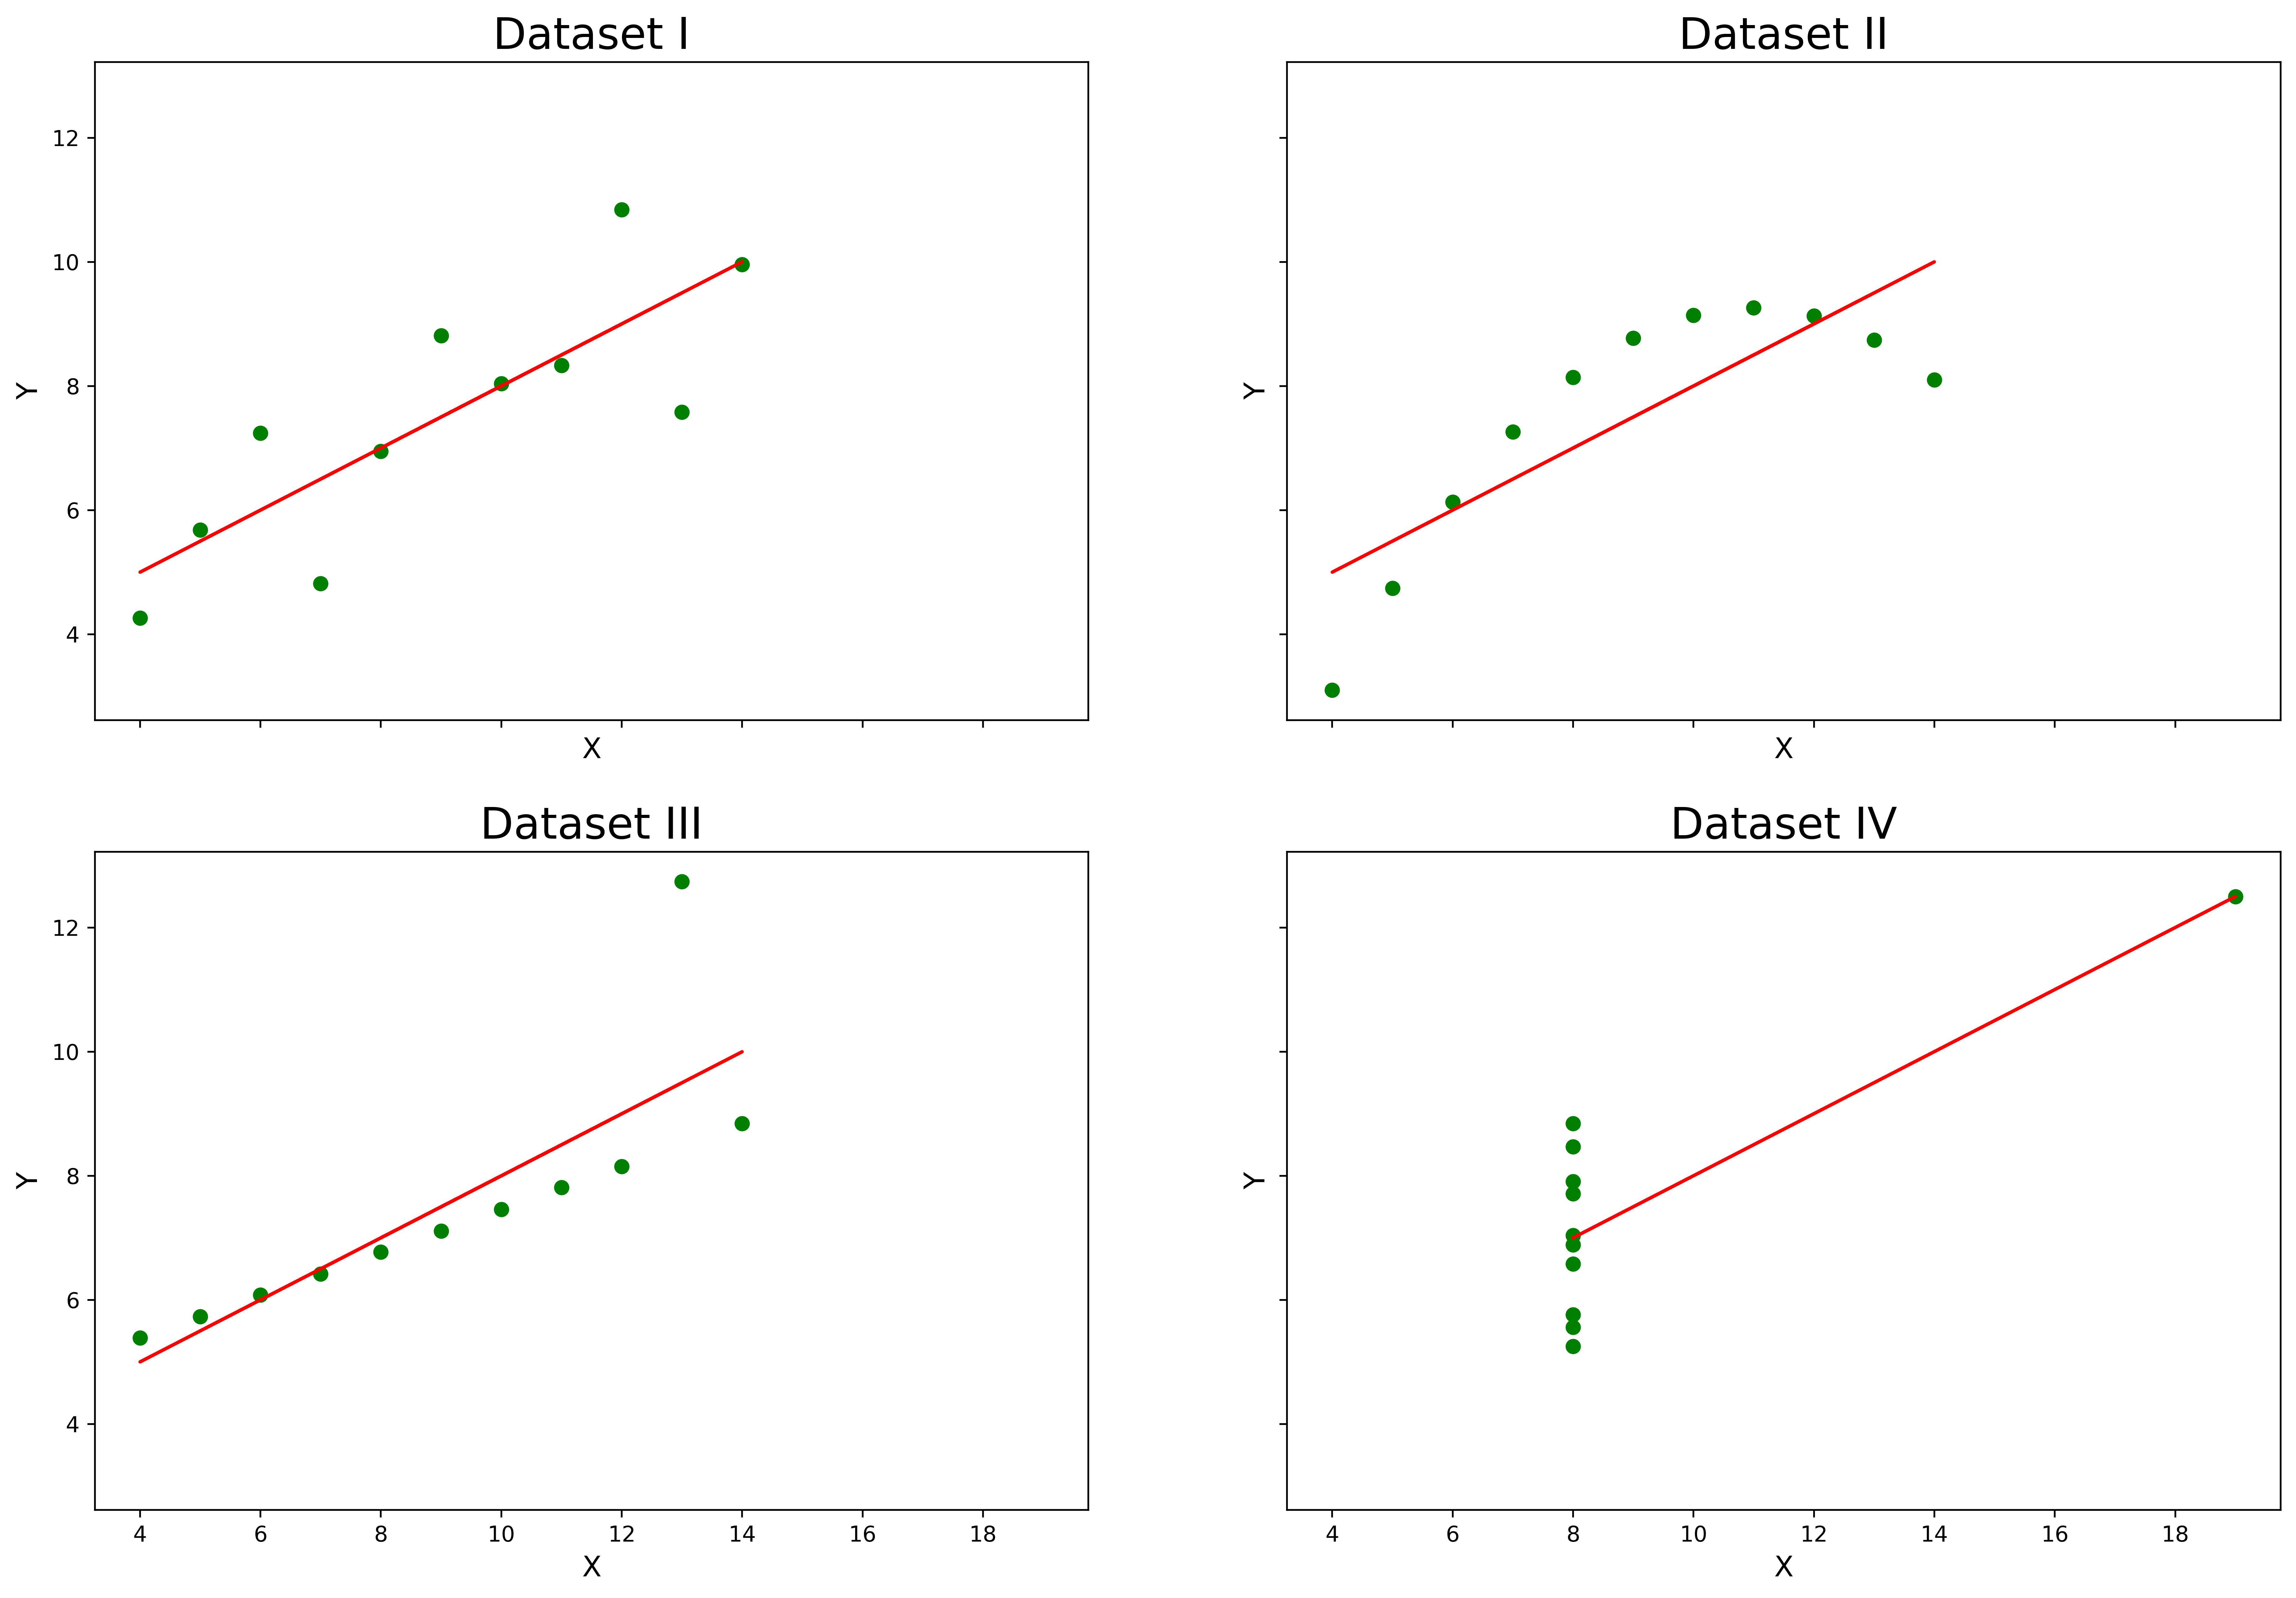

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(18,12), dpi=500, sharex=True, sharey=True)

axs[0, 0].set_title('Dataset I', fontsize=20)
axs[0, 0].set_xlabel('X', fontsize=13)
axs[0, 0].set_ylabel('Y', fontsize=13)
axs[0, 0].plot(reg_1['x'], reg_1['y'], 'go')
axs[0, 0].plot(reg_1['x'], slope_1*reg_1['x']+intercept_1,'r')

axs[0, 1].set_title('Dataset II',fontsize=20)
axs[0, 1].set_xlabel('X', fontsize=13)
axs[0, 1].set_ylabel('Y', fontsize=13)
axs[0, 1].plot(reg_2['x'], reg_2['y'], 'go')
axs[0, 1].plot(reg_2['x'], slope_2*reg_2['x']+intercept_2,'r')

axs[1, 0].set_title('Dataset III',fontsize=20)
axs[1, 0].set_xlabel('X', fontsize=13)
axs[1, 0].set_ylabel('Y', fontsize=13)
axs[1, 0].plot(reg_3['x'], reg_3['y'], 'go')
axs[1, 0].plot(reg_3['x'], slope_3*reg_3['x']+intercept_3,'r')

axs[1, 1].set_title('Dataset IV',fontsize=20)
axs[1, 1].set_xlabel('X', fontsize=13)
axs[1, 1].set_ylabel('Y', fontsize=13)
axs[1, 1].plot(reg_4['x'], reg_4['y'], 'go')
axs[1, 1].plot(reg_4['x'], slope_4*reg_4['x']+intercept_4,'r')

plt.show();

## 4. What to do if your data has more than 3D's

* Principal Components Analysis (PCA)
* Fischer Discriminant Analysis